In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

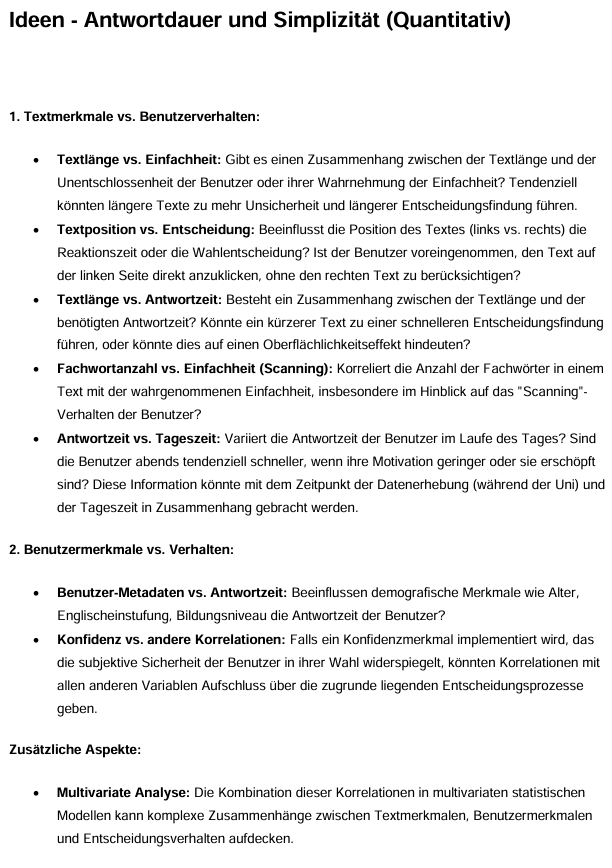

## 1. Antwortdauer, Agreement

In [2]:
files = os.listdir("../export") # die ersten paar sind noch unique, dann wiederholt sich 47
base = "../export/"
rater_dic = {}
for i in range(0,len(files)):
    if "Scores" not in files[i] and "-94" in files[i] and "_" not in files[i]:
        df = pd.read_csv(base+files[i])
        df["time_diff_seconds"] = 0
        timestamps = pd.to_datetime(df['time'], format='%H:%M:%S')
        for y in range(1,len(df)):
            if timestamps[y] < timestamps[y-1]:
                timestamps[y] += pd.Timedelta(days = 1)
            df.loc[y-1, "time_diff_seconds"] = (timestamps[y] - timestamps[y-1]).total_seconds()
        rater_dic[files[i].split(".")[0]] = df

In [37]:
rater_dic["aab-94"]

,Unnamed: 0,candidates,winner,time,left,right,time_diff_seconds
0,0,"(57, 51)",57,12:20:02,57,51,12
1,1,"(45, 69)",45,12:20:14,45,69,10
2,2,"(29, 93)",93,12:20:24,29,93,21
3,3,"(1, 67)",1,12:20:45,1,67,14
4,4,"(20, 27)",27,12:20:59,20,27,18
...,...,...,...,...,...,...,...
371,371,"(10, 47)",10,14:09:43,10,47,5
372,372,"(67, 31)",67,14:09:48,67,31,20
373,373,"(61, 90)",90,14:10:08,61,90,13
374,374,"(49, 82)",82,14:10:21,49,82,6


In [38]:
rater_dic_median_time = {}
for key, value in rater_dic.items():
    rater_dic_median_time[key] =  value["time_diff_seconds"].median()

In [39]:
rater_dic_median_time

{'aab-94': 7.0,
 'ArthMa-94': 5.0,
 'Casomoto-94': 2.0,
 'DisRating-94': 8.0,
 'ghost-94': 8.0,
 'Kaffeetrinker-94': 7.0,
 'Peter-94': 9.0,
 'Power-94': 9.5,
 'Rater1-94': 13.0,
 'Rater2-94': 7.0,
 'Rater3-94': 8.0,
 'Rater4-94': 7.0,
 'Rater5-94': 26.0,
 'Rater6-94': 8.0,
 'vikoooy-94': 7.0}

In [40]:
rater_df = pd.DataFrame.from_dict(rater_dic_median_time, orient='index', columns=['median_time'])
rater_df.reset_index(inplace=True)
rater_df.rename(columns={'index': 'rater'}, inplace=True)

In [41]:
agrreement = pd.read_csv(base+"IAA.csv")

In [42]:
agrreement.rename(columns={'Unnamed: 0': 'rater'}, inplace=True)
merged_df = pd.merge(rater_df, agrreement, on='rater', how='outer')
merged_df = merged_df.dropna()
merged_df = merged_df.drop(columns=['Cohens Kappa', 'Rank correlation'])

In [43]:
merged_df

,rater,median_time,Agreement Percentage
0,aab-94,7.0,0.768617
1,ArthMa-94,5.0,0.765957
2,Casomoto-94,2.0,0.808511
3,DisRating-94,8.0,0.843085
4,ghost-94,8.0,0.795213
5,Kaffeetrinker-94,7.0,0.784574
6,Peter-94,9.0,0.773936
7,Power-94,9.5,0.686170
8,Rater1-94,13.0,0.885638
9,Rater2-94,7.0,0.808511


In [44]:
correlation = merged_df['median_time'].corr(merged_df['Agreement Percentage'])
correlation

-0.009485943438847651

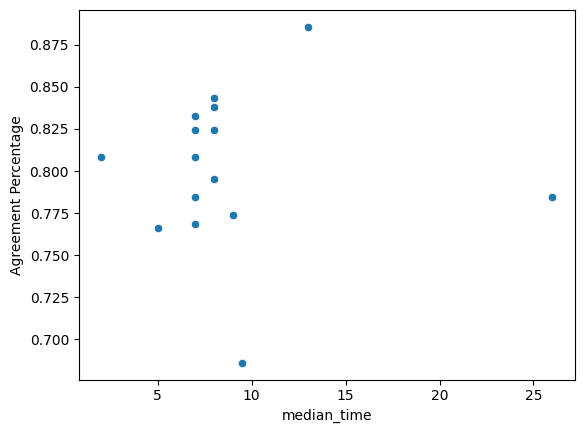

In [45]:
sns.scatterplot(x = merged_df['median_time'], y = merged_df['Agreement Percentage'])
plt.show()

### Result:
-0.0095 indicates a very weak negative linear relationship between the median time and the agreement percentage.

In practical terms, this means that there is almost no linear association between the two variables. The negative sign indicates a very slight tendency for the agreement percentage to decrease slightly as the median time increases, but this relationship is extremely weak.

Therefore, based on this correlation coefficient alone, we cannot conclude that there is any meaningful relationship between median time and agreement percentage.

## 2. Textlänge, Einfachheit

In [2]:
base = "../export/"
average_ranking = pd.read_csv(base + "Scores___Gold15.csv")

In [3]:
average_ranking

,Unnamed: 0,Score,Text
0,0,0.50538,"Meanwhile, on Raw, fans were immersed in the f..."
1,1,0.25806,Dows is a city in franklin and wright counties...
2,2,0.23656,"Dauenhauer died at her home in Juneau, Alaska ..."
3,3,0.40860,The meetings of the Federal Council and the re...
4,4,0.97849,After a four day pass the Brigade conducted it...
...,...,...,...
89,89,0.01075,Ohio state's library system includes twenty-on...
90,90,0.98925,The polysaccharide antigens were used to stimu...
91,91,0.26882,"In these cases, the symptoms are often severe ..."
92,92,0.91398,"In the seventies, Robert Austrian championed t..."


In [4]:
average_ranking["text_len"] = average_ranking["Text"].apply(lambda x: len(x))

In [5]:
average_ranking

,Unnamed: 0,Score,Text,text_len
0,0,0.50538,"Meanwhile, on Raw, fans were immersed in the f...",100
1,1,0.25806,Dows is a city in franklin and wright counties...,117
2,2,0.23656,"Dauenhauer died at her home in Juneau, Alaska ...",86
3,3,0.40860,The meetings of the Federal Council and the re...,141
4,4,0.97849,After a four day pass the Brigade conducted it...,226
...,...,...,...,...
89,89,0.01075,Ohio state's library system includes twenty-on...,90
90,90,0.98925,The polysaccharide antigens were used to stimu...,209
91,91,0.26882,"In these cases, the symptoms are often severe ...",87
92,92,0.91398,"In the seventies, Robert Austrian championed t...",98


In [6]:
average_ranking["text_len_normalized"] = (average_ranking["text_len"]-min(average_ranking["text_len"]))/(max(average_ranking["text_len"])-min(average_ranking["text_len"]))

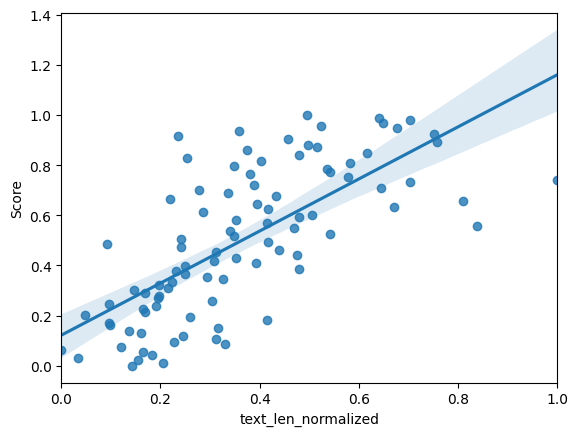

In [7]:
sns.regplot(x = average_ranking['text_len_normalized'], y = average_ranking['Score'])
plt.show()

In [49]:
average_ranking['text_len_normalized'].corr(average_ranking['Score'])

0.7100670867596122

## Antwortzeit im laufe der befragung (wiedererkennungswert der texte)

In [36]:
files = os.listdir("../export") # die ersten paar sind noch unique, dann wiederholt sich 47
base = "../export/"
rater_dic = {}
for i in range(0,len(files)):
    if "Scores" not in files[i] and "-94" in files[i] and "_" not in files[i]:
        df = pd.read_csv(base+files[i])
        df["time_diff_seconds"] = 0
        timestamps = pd.to_datetime(df['time'], format='%H:%M:%S')
        for y in range(1, len(df)):
            if timestamps[y] < timestamps[y-1]:
                timestamps[y] += pd.Timedelta(days = 1)
                df.loc[y-1, "time_diff_seconds"] = (timestamps[y] - timestamps[y-1]).total_seconds()
                timestamps[y] -= pd.Timedelta(days = 1)
            else:
                df.loc[y-1, "time_diff_seconds"] = (timestamps[y] - timestamps[y-1]).total_seconds()
        rater_dic[files[i].split(".")[0]] = df

In [72]:
time_diff_values = np.zeros(376 * len(rater_dic.values())).reshape(376, len(rater_dic.values()))
for i, value in enumerate(rater_dic.values()):
    time_diff_values[:, i] += value["time_diff_seconds"].values

In [79]:
median_time_per_questions = np.zeros(376)
for i in range(0, len(time_diff_values)):
    median_time_per_questions[i] = np.median(time_diff_values[i])

### MEDIAN ANTWORTZEIT GEHT SICHTLICH RUNTER IM LAUFE DER BEFRAGUNG

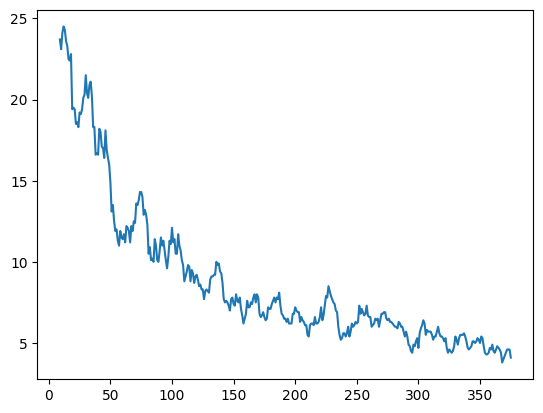

In [98]:
sns.lineplot(data = pd.Series(median_time_per_questions).rolling(10).mean())
plt.show()

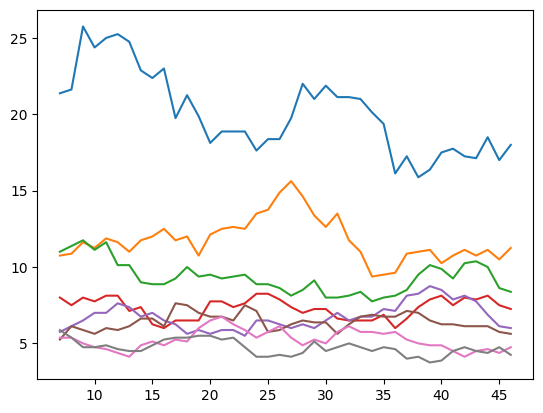

In [111]:
sns.lineplot(data = pd.Series(median_time_per_questions)[0:47].reset_index(drop = True).rolling(8).mean())
sns.lineplot(data = pd.Series(median_time_per_questions)[47:94].reset_index(drop = True).rolling(8).mean())
sns.lineplot(data = pd.Series(median_time_per_questions)[94:141].reset_index(drop = True).rolling(8).mean())
sns.lineplot(data = pd.Series(median_time_per_questions)[141:188].reset_index(drop = True).rolling(8).mean())
sns.lineplot(data = pd.Series(median_time_per_questions)[188:235].reset_index(drop = True).rolling(8).mean())
sns.lineplot(data = pd.Series(median_time_per_questions)[235:282].reset_index(drop = True).rolling(8).mean())
sns.lineplot(data = pd.Series(median_time_per_questions)[282:329].reset_index(drop = True).rolling(8).mean())
sns.lineplot(data = pd.Series(median_time_per_questions)[329:376].reset_index(drop = True).rolling(8).mean())
plt.show()